# Exploratory Analysis of the Olympics: 1896 - 2022
<br>
The tradition of the Olympics dates back to 776 BC when the ancient Greeks held a festival every four years to honor Zeus. These early festivals included sporting games, arts, music, poetry, and theater. However, these games were banned in 393 AD by the Roman Emperor Theodosius I, who believed that the games encouraged paganism.
<br>
The Olympic games were revived in 1894 at the first Olympic Congress. The Olympic Congress established the International Olympic Committee (IOC), who developed guiding principles for the games.
<br>
<ul>
    <li> Bring athletes from across the world together every four years.</li>
    <li> Foster goodwill worldwide through education and collaboration.</li>
    <li> Promote the physical and mental attributes for sports.</li>
</ul>
<br>
After the establishment of the IOC, the first Olympic Games took place in Athens, Greece in 1896. From that point forward, the games evolved to include Summer and Winter Olympic events.
<br> *Background information from <a href="https://olympics.com/en/news/the-history-of-the-olympic-games">Olympics.com</a>*
<br><br>
The goal of this analysis was to explore how the games have evolved since 1896 using data scraped from <a href="www.olympedia.org">Olympedia</a> and published on <a href="https://www.kaggle.com/datasets/josephcheng123456/olympic-historical-dataset-from-olympediaorg?select=Olympic_Athlete_Bio.csv"> Kaggle</a> by Joseph Cheng. The datasets are licensed as CC0: Public Domain.
<br>
The data are contained in 6 separate csv files:
<ol>
    <li><b>Olympic_Athlete_Bio:</b> Contains demographic and physical information about all athletes that have competed in the games.</li>
    <li><b>Olympic_Athlete_Event_Results:</b> Contains medal results for each event played in the games.</li>
    <li><b>Olympic_Games_Medal_Tally:</b> Contains a count of countries who have won at least one medal during the games.</li>
    <li><b>Olympic_Results:</b> Contains detailed information about the results for each sporting event at the games.</li>
    <li><b>Olympics_Country:</b> Contains a list of all countries that have participated in the games, with their assigned NOC code.</li>
    <li><b>Olympics_Games:</b> Contains a list of all games that have been played between 1896 and 2022.</li>
</ol>
<br>
The datasets were loaded into a SQLite database. Tables are related to each other based on the below ERD, provided by Kaggle user <a href="https://www.kaggle.com/Richnou">Richnou.</a>
<br>
<img src="https://datas.fun/olympic.png" />
<br>
The Olympic data will be analyzed by exploring the following topics:
<ul>
    <li> How has the demographics of athletes, particularly gender, changed over time?</li>
    <li> Which countries have won the most medals since 1896?</li>
    <li> Which events has the United States won the most medals in?</li>
</ul>
<br><br><br>

#### 1. Connect to SQLite database and prepare the notebook for analysis using SQL.

In [1]:
# Import needed packages
import sqlite3
import pandas as pd

# Create a connection to the SQLite database
conn = sqlite3.connect('Olympics_DB.db')

# Load the SQL extension for Jupyter Notebook
%load_ext sql

# Connect to the database using the SQL magic command
%sql sqlite:///Olympics_DB.db

#### 2. Check That the Tables in the Olympics Database Have Been Loaded Correctly.

Checking Olympic_Athlete_Bio table by observing the first 5 records.

In [2]:
%%sql

SELECT *
FROM Olympic_Athlete_Bio
LIMIT 5;

 * sqlite:///Olympics_DB.db
Done.


athlete_id,name,sex,born,height,weight,country,country_noc,description,special_notes
65649,Ivanka Bonova,Female,4 April 1949,166,55,Bulgaria,BUL,Personal Best: 400 – 53.54 (1980).,None
112510,Nataliya Uryadova,Female,15 March 1977,184,70,Russian Federation,RUS,None,Listed in Olympians Who Won a Medal at the European Beach Volleyball Championships (1–0–0 2006 Den Haag gold)
114973,Essa Ismail Rashed,Male,14 December 1986,165,55,Qatar,QAT,Personal Best: 10000 – 27:20.97 (2006).,Listed in Olympians Who Won a Medal at the Asian Games (0–2–0 2006 Doha ATH silver: 10000 m; 2010 Guangzhou ATH silver: 10000 m)
30359,Péter Boros,Male,12 January 1908,None,None,Hungary,HUN,"Between 1927 and 1938, Péter Boros competed as a gymnast of BBTE. He won the Hungarian championship in rope climbing in 1932, and as part of the winning team in 1932, 1937 and 1938. As a member of the Hungarian national team, he took part in the 1930 World Championships and the 1932 Olympics both times finishing fourth in the team event. In individual events, he took two 5th places (pommelled horse and rope climbing). After the Olympics due to a series of injuries he did not regain his old form. After completing his career, he worked as a paper merchant.",None
50557,Rudolf Piowatý,Male,28 April 1900,None,None,Czechoslovakia,TCH,"Rudolf Piowaty joined the Czechoslovak military near the end of World War I, and began his full-time military service in October 1921, leading to his career as a military officer. He also became a top swimmer while in the Army and won his first Czechoslovak title in 1921. He continued to win national titles over the next few years, allowing him to compete at the 1924 Paris Olympics. During World War II Piowaty left occupied Czechoslovakia in July 1942, and made his way to Germany, near Lake Constance. He used his swimming prowess to get to Switzerland, swimming across the lake. Piowaty settled in Genève where he worked for the League of Nations in the Office of the Permanent Delegation to the Czechoslovak Republic. After the liberation of France, Piowaty was sent across that country to Great Britain where he served in the Czechoslovak reserves as a lieutenant and became interim commander of his company. He returned to Czechoslovakia on 14 November 1945 and was awarded the Czechoslovak Military Medal of Merit, 2nd degree, and the Czechoslovak Military Commemorative Medal, after which he was transferred to the reserves permanently. After the Communist takeover Piowaty left his home country in 1948 to settle in Canada where he worked in the furniture trade and leisure and tourism.",None


Checking Olympic_Athlete_Event_Results by examining the first 5 records.

In [3]:
%%sql

SELECT *
FROM Olympic_Athlete_Event_Results
LIMIT 5;

 * sqlite:///Olympics_DB.db
Done.


edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport
1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,None,False
1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,None,False
1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,None,False
1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,None,False
1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,None,False


Checking Olympic_Games_Medal_Tally by examining the first 5 records.

In [4]:
%%sql

SELECT *
FROM Olympic_Games_Medal_Tally
LIMIT 5;

 * sqlite:///Olympics_DB.db
Done.


edition,edition_id,year,country,country_noc,gold,silver,bronze,total
1896 Summer Olympics,1,1896,United States,USA,11,7,2,20
1896 Summer Olympics,1,1896,Greece,GRE,10,18,19,47
1896 Summer Olympics,1,1896,Germany,GER,6,5,2,13
1896 Summer Olympics,1,1896,France,FRA,5,4,2,11
1896 Summer Olympics,1,1896,Great Britain,GBR,2,3,2,7


Checking Olympic_Results by examining the first 5 records.

In [5]:
%%sql

SELECT *
FROM Olympic_Results
LIMIT 5;

 * sqlite:///Olympics_DB.db
Done.


result_id,event_title,edition,edition_id,sport,sport_url,result_date,result_location,result_participants,result_format,result_detail,result_description
30359,"Super-Heavyweight (>105 kilograms), Men",2004 Summer Olympics,26,Weightlifting,/editions/26/sports/WLF,"25 August 2004 — 16:30 (B), 20:00 (A)","Olympiako Gymnastirio Arsis Varon Nikaias, Nikaia",17 from 15 countries,Total of best lifts in snatch and clean & jerk determined placement. Ties broken by lightest bodyweight.,na,"Not so much a competition as a coronation, the gold medal in this event went to Iranian Hossein Reza Zadeh, who was the defending champion and had won the 2002-03 World Championships. Reza Zadeh led after the snatch with 210.0 kg, and then lifted a world record 262.5 kg in the clean & jerk, matching his world record total of 472.5 kg. His clean & jerk was re-measured at 263.5 kg for record purposes. German Ronny Weller had been the silver medalist in this class in 1996 and 2000, and had won medals at the last four Olympics. Attempting to become the first weightlifter to win five medals, he injured himself on his second snatch, and dropped out of the competition. Latvia’s Viktors Ščerbatihs won silver, although well behind Reza Zadeh, and he would return in 2008 and add a bronze medal in the class."
1626,"Giant Slalom, Women1",1998 Winter Olympics,46,Snowboarding,/editions/46/sports/SBD,9 February 1998,"Mt. Yakebitai, Shiga Kogen, Yamanouchi",31 from 14 countries,"Two runs, total time determined placement.",Gates: 38 / 36Length: 936 mStart Altitude: 1960 mVertical Drop: 290 m,"The women’s giant slalom was postponed one day because of a snowstorm that interrupted the competition. The heavy favorite was France’s Karine Ruby, who had won all but one World Cup event in 1997-98, and had won the 1996 FIS World Championships. On the first run, she overwhelmed the field, leading by 1.95 second over her teammate, Isabelle Blanc. On the second run Ruby boarded carefully to protect her lead but still won the gold medal by almost two seconds over Germany’s Heidi Renoth. Blanc had the silver medal in her grasp when she missed the final gate on her second run, and fell, sliding across the finish line. Ruby would compete again at the 2002 and 2006 Winter Olympics, winning a silver medal in 2002 in parallel giant slalom, and switching to boardercross for the 2006 Winter Olympics. She then began training to become a mountain guide and was killed in late May 2009 when she fell into a crevasse on Mont Blanc. Isabelle Blanc returned in 2002 to win the gold medal in the parallel giant slalom."
76,"Singles, Men",1976 Winter Olympics,40,Luge,/editions/40/sports/LUG,4 – 7 February 1976,"Kunsteis-Bob- und Rodelbahn, Igls",43 from 15 countries,"Four runs, total time determined placement.",Curves: 14Length: 1220 mStart Altitude: ?Vertical Drop: 103 m,"Once more, the competitors from East and West Germany divided the medals among them. The strength of the East German team was shown from the fact that the reigning World Champion and 1972 bronze medallist, Wolfram Fiedler, did not make the cut. This left 1973 World Champion Hans Rinn as the clear favourite. But he made a serious error in the first run, putting him 0.6 seconds behind Dettlef Günther, who had been the 1975 European Champion, but had only managed a 7th spot at the World Championships. Günther would also win the 3rd and 4th run, giving him a comfortable lead. Only West German Josef Fendt could seriously challenge him, but even the former World Champion (1970, 1973) had to concede half a second in the final standings.The unluckiest slider in Innsbruck was without a doubt Huang Liu-Chong. He was actually the best non-European, as shown by his performances in the first and fourth run, but he finished last because of two crashes in the other two runs. Remarkably, he did finish both times, but ended up more than one minute behind the next-to-last luger – a huge gap in luge terms."
962,"1,500 metres, Men",1928 Winter Olympics

Checking Olympics_Games by examining the first 5 records.

In [6]:
%%sql

SELECT *
FROM Olympics_Games
LIMIT 5;

 * sqlite:///Olympics_DB.db
Done.


edition,edition_id,edition_url,year,city,country_flag_url,country_noc,start_date,end_date,competition_date,isHeld
1896 Summer Olympics,1,/editions/1,1896,Athina,https://olympedia-flags.s3.eu-central-1.amazonaws.com/GRE.png,GRE,6 April,15 April,6 – 13 April,None
1900 Summer Olympics,2,/editions/2,1900,Paris,https://olympedia-flags.s3.eu-central-1.amazonaws.com/FRA.png,FRA,None,None,14 May – 28 October,None
1904 Summer Olympics,3,/editions/3,1904,St. Louis,https://olympedia-flags.s3.eu-central-1.amazonaws.com/USA.png,USA,14 May,None,1 July – 26 November,None
1908 Summer Olympics,5,/editions/5,1908,London,https://olympedia-flags.s3.eu-central-1.amazonaws.com/GBR.png,GBR,13 July,25 July,27 April – 31 October,None
1912 Summer Olympics,6,/editions/6,1912,Stockholm,https://olympedia-flags.s3.eu-central-1.amazonaws.com/SWE.png,SWE,6 July,15 July,5 May – 27 July,None


Checking Olympics_Country by examining the first 5 records.

In [7]:
%%sql

SELECT *
FROM Olympics_Country
LIMIT 5;

 * sqlite:///Olympics_DB.db
Done.


noc,country
AFG,Afghanistan
ALB,Albania
ALG,Algeria
ASA,American Samoa
AND,Andorra


### Exploring How the Athlete Demographic Has Changed Over Time

#### 3. How has the number of athletes changed over time?

The following query calculates the number of unique athletes participating in the Summer Olympics for each year, using the Olympic_Athlete_Event_Results table.
<br>
<ol>
    <li> The Year and Games are extracted from the edition column.</li>
    <li> The number of athletes is determined based on the count of distinct athlete_id.</li>
    <li> The results are filtered to include only 'Summer Olympics' games.</li>
    <li> The results are grouped and ordered by year.</li>
</ol>

In [8]:
%%sql

SELECT
    CAST(SUBSTR(edition, 1, 4) AS INTEGER) AS Year,
    SUBSTR(edition, 6) AS Games,
    COUNT(DISTINCT athlete_id) AS number_athletes
FROM Olympic_Athlete_Event_Results
WHERE SUBSTR(edition, 6) = 'Summer Olympics'
GROUP BY Year
ORDER BY Year;

 * sqlite:///Olympics_DB.db
Done.


Year,Games,number_athletes
1896,Summer Olympics,243
1900,Summer Olympics,2165
1904,Summer Olympics,1364
1908,Summer Olympics,2423
1912,Summer Olympics,2876
1920,Summer Olympics,2879
1924,Summer Olympics,3970
1928,Summer Olympics,3828
1932,Summer Olympics,2057
1936,Summer Olympics,5084


<b> Summer Olympics:</b>
<br>
The number of athletes has increased from 243 in the 1896 games to 11,579 in the 2020 games.
<br>
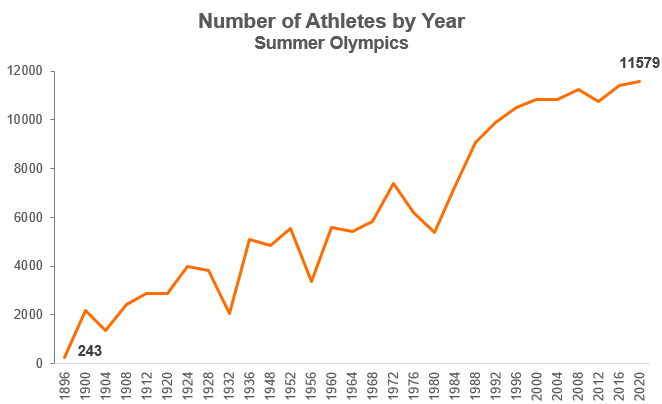

Perform the same query, but filter for 'Winter Olympics'

In [10]:
%%sql

SELECT
    CAST(SUBSTR(edition, 1, 4) AS INTEGER) AS Year,
    SUBSTR(edition, 6) AS Games,
    COUNT(DISTINCT athlete_id) AS number_athletes
FROM Olympic_Athlete_Event_Results
WHERE SUBSTR(edition, 6) = 'Winter Olympics'
GROUP BY Year
ORDER BY Year;

 * sqlite:///Olympics_DB.db
Done.


Year,Games,number_athletes
1924,Winter Olympics,375
1928,Winter Olympics,521
1932,Winter Olympics,385
1936,Winter Olympics,889
1948,Winter Olympics,730
1952,Winter Olympics,733
1956,Winter Olympics,834
1960,Winter Olympics,670
1964,Winter Olympics,1196
1968,Winter Olympics,1195


<b> Winter Olympics:</b>
<br>
The number of athletes has increased from 375 in the 1924 games to 2,848 in the 2022 games.
<br>
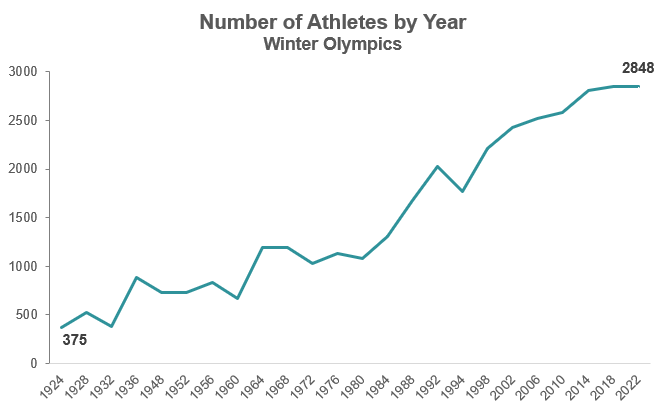

<b> Summer vs. Winter Olympics</b>
<br>
Both events have seen a substantial increase in the number of competing athletes. However, as of the 2020 and 2022 games, there are approximately 4 times as many athletes competing in the summer games (11,579 vs. 2,848 respectively)

#### 4. How has the gender ratio of athletes changed over time?

The following query analyzes athlete gender data for the Summer Olympics.
<br>
<ol>
    <li> A CTE, athlete_counts, is created to extract the Year and Event (Summer vs. Winter) from the 'edition' column in the Olympic_Athlete_Event_Results table. It also extracts the gender and athlete ID from the Olympic_Athlete_Bio table. The data are then filtered to only include records for the Summer Olympics. Finally, data are grouped by Year, Event, Gender, and Athlete ID.</li>
    <li> The main query uses the athlete_counts temporary table to calculate the number of males, number of females, number of total athletes, percent males, and percent females participating in the games. It orders the results by year.</li>
</ol>

In [12]:
%%sql

WITH athlete_counts AS (
    SELECT
        CAST(SUBSTR(er.edition, 1, 4) AS INTEGER) AS Year,
        SUBSTR(er.edition, 6) AS Event,
        ab.sex AS gender,
        ab.athlete_id AS athlete
    FROM Olympic_Athlete_Bio AS ab
    INNER JOIN Olympic_Athlete_Event_Results AS er
        ON ab.athlete_id = er.athlete_id
    WHERE SUBSTR(er.edition, 6) = 'Summer Olympics'
    GROUP BY gender, Year, Event, athlete
)
SELECT
    Year,
    Event,
    COUNT(DISTINCT CASE WHEN gender = 'Male' THEN athlete END) AS num_males,
    COUNT(DISTINCT CASE WHEN gender = 'Female' THEN athlete END) AS num_females,
    COUNT(DISTINCT athlete) AS total_athletes,
    ROUND((COUNT(DISTINCT CASE WHEN gender = 'Male' THEN athlete END) * 1.0 / COUNT(DISTINCT athlete)) * 100.0, 1) AS percent_male,
    ROUND((COUNT(DISTINCT CASE WHEN gender = 'Female' THEN athlete END) * 1.0 / COUNT(DISTINCT athlete)) * 100.0, 1) AS percent_female
FROM athlete_counts
GROUP BY Year, Event
ORDER BY Year;

 * sqlite:///Olympics_DB.db
Done.


Year,Event,num_males,num_females,total_athletes,percent_male,percent_female
1896,Summer Olympics,241,2,243,99.2,0.8
1900,Summer Olympics,2121,40,2161,98.1,1.9
1904,Summer Olympics,1358,6,1364,99.6,0.4
1908,Summer Olympics,2369,54,2423,97.8,2.2
1912,Summer Olympics,2814,62,2876,97.8,2.2
1920,Summer Olympics,2773,106,2879,96.3,3.7
1924,Summer Olympics,3800,170,3970,95.7,4.3
1928,Summer Olympics,3471,357,3828,90.7,9.3
1932,Summer Olympics,1850,205,2055,90.0,10.0
1936,Summer Olympics,4696,384,5080,92.4,7.6


<b>Summer Olympics:</b>
<br>
The ratio of male:female athletes has decreased over time, from 99.2% male and 0.8% female in the 1896 games to 52.2% male and 47.8% female in the 2020 games. While the early games were mostly dominated by male athletes, the most recent games have a nearly 50:50 split male:female athletes competing.
<br>
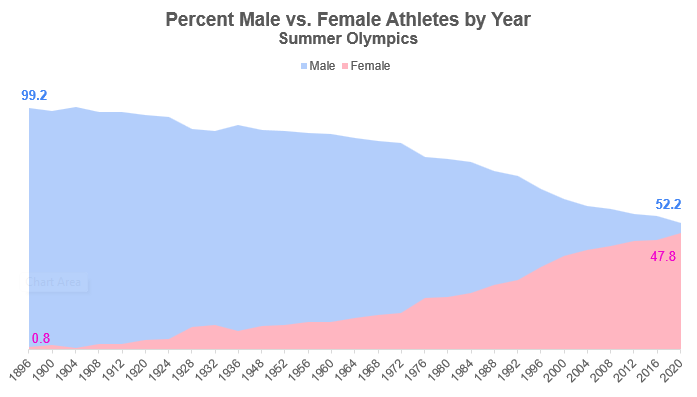

Perform the same query but filter for Winter Olympics.

In [13]:
%%sql

WITH athlete_counts AS (
    SELECT
        CAST(SUBSTR(er.edition, 1, 4) AS INTEGER) AS Year,
        SUBSTR(er.edition, 6) AS Event,
        ab.sex AS gender,
        ab.athlete_id AS athlete
    FROM Olympic_Athlete_Bio AS ab
    INNER JOIN Olympic_Athlete_Event_Results AS er
        ON ab.athlete_id = er.athlete_id
    WHERE SUBSTR(er.edition, 6) = 'Winter Olympics'
    GROUP BY gender, Year, Event, athlete
)
SELECT
    Year,
    Event,
    COUNT(DISTINCT CASE WHEN gender = 'Male' THEN athlete END) AS num_males,
    COUNT(DISTINCT CASE WHEN gender = 'Female' THEN athlete END) AS num_females,
    COUNT(DISTINCT athlete) AS total_athletes,
    ROUND((COUNT(DISTINCT CASE WHEN gender = 'Male' THEN athlete END) * 1.0 / COUNT(DISTINCT athlete)) * 100.0, 1) AS percent_male,
    ROUND((COUNT(DISTINCT CASE WHEN gender = 'Female' THEN athlete END) * 1.0 / COUNT(DISTINCT athlete)) * 100.0, 1) AS percent_female
FROM athlete_counts
GROUP BY Year, Event
ORDER BY Year;

 * sqlite:///Olympics_DB.db
Done.


Year,Event,num_males,num_females,total_athletes,percent_male,percent_female
1924,Winter Olympics,359,16,375,95.7,4.3
1928,Winter Olympics,493,28,521,94.6,5.4
1932,Winter Olympics,351,34,385,91.2,8.8
1936,Winter Olympics,774,115,889,87.1,12.9
1948,Winter Olympics,650,80,730,89.0,11.0
1952,Winter Olympics,623,110,733,85.0,15.0
1956,Winter Olympics,699,135,834,83.8,16.2
1960,Winter Olympics,525,145,670,78.4,21.6
1964,Winter Olympics,995,201,1196,83.2,16.8
1968,Winter Olympics,969,226,1195,81.1,18.9


<b>Winter Olympics:</b>
<br>
The ratio of male:female athletes has decreased over time, from 95.7% male and 4.3% female in the 1924 games to 55.2% male and 44.8% female in the 2022 games. While the early games were mostly dominated by male athletes, the most recent games are closer to a 50:50 split male:female athletes competing.
<br>
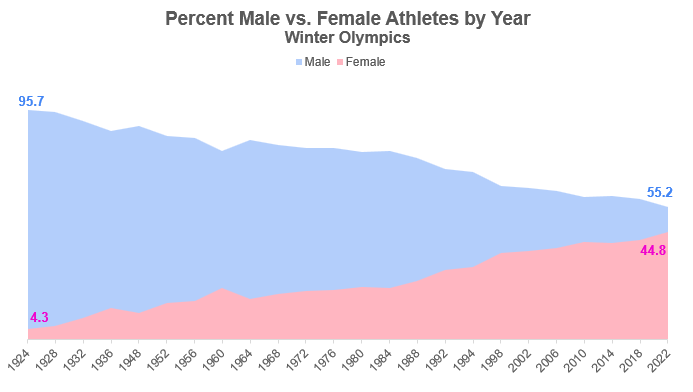

#### 5. Is there a difference in Olympic performance between male and female athletes?

This query analyzes medal distribution by medal type and gender for athletes who particpated in the most recent games: 2020 Summery Olympics and 2022 Winter Olympics.
<ol>
    <li>A CTE, athlete_data, is created to join the two tables: Olympic_Athlete_Bio and Olympic_Athlete_Event_Results, and then extract athlete_id, sex, Year, Event, and medal. Data are filtered to only include entries from the 2020 and 2022 games.</li>
    <li>The main query uses the athlete_data CTE to calculate medal counts for each medal type (Gold, Silver, Bronze, and total). Data are then grouped by Event and Sex (gender).</li>
</ol>

In [14]:
%%sql

WITH athlete_data AS (
    SELECT
        a.athlete_id,
        a.sex,
        CAST(SUBSTR(e.edition, 1, 4) AS INTEGER) AS Year,
        SUBSTR(e.edition, 6) AS Event,
        e.medal
    FROM Olympic_Athlete_Bio AS a
    INNER JOIN Olympic_Athlete_Event_Results AS e
        ON a.athlete_id = e.athlete_id
    WHERE CAST(SUBSTR(e.edition, 1, 4) AS INTEGER) IN (2020, 2022)
)
SELECT
    Year,
    Event,
    sex,
    COUNT(CASE WHEN medal = 'Gold' THEN 1 ELSE NULL END) AS gold_medals,
    COUNT(CASE WHEN medal = 'Silver' THEN 1 ELSE NULL END) AS silver_medals,
    COUNT(CASE WHEN medal = 'Bronze' THEN 1 ELSE NULL END) AS bronze_medals,
    COUNT(CASE WHEN medal IN ('Gold', 'Silver', 'Bronze') THEN 1 ELSE NULL END) AS total_medals
FROM athlete_data
GROUP BY Event, sex;

 * sqlite:///Olympics_DB.db
Done.


Year,Event,sex,gold_medals,silver_medals,bronze_medals,total_medals
2020,Summer Olympics,Female,398,383,421,1202
2020,Summer Olympics,Male,398,395,439,1232
2022,Winter Olympics,Female,113,111,109,333
2022,Winter Olympics,Male,132,132,129,393


<b>Medal Distribution by Gender:</b>
<br>
In both the Summer and Winter Olympics, men and women are earning similar numbers of medals, with men earning only 30 more medals (out of 2,434) than women in the summer games, and men earning 60 more medals (out of 726) than women in the winter games. This is most likely due to men's sports having more team events and/or having more total events. 
<br>
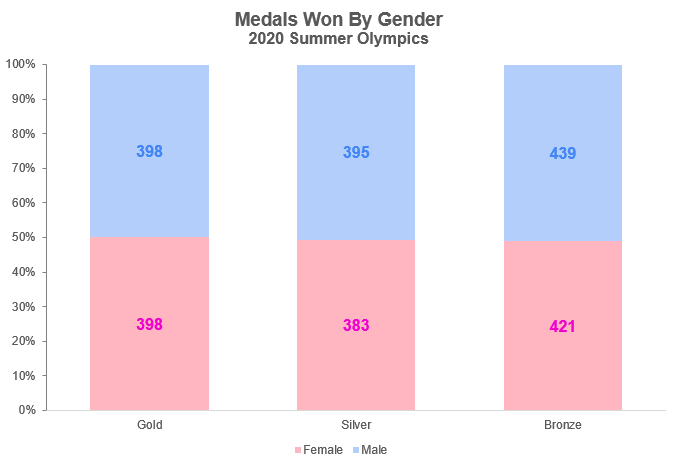
<br>
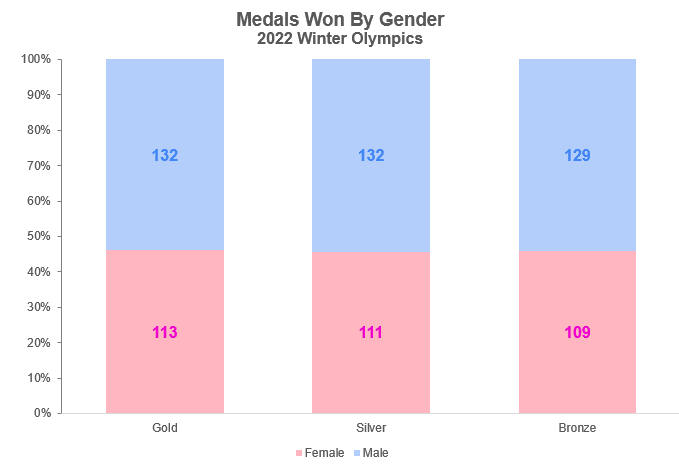

#### 6. Which countries have won the most medals in the Olympic games?

This query calculates the total number of medals (gold, silver, bronze) won by each country. It ensures that each medal event is counted only once (as opposed to counting each medal winning athlete for a team event).
<ol>
    <li>The CTE, MedalCounts, calculates the count of gold, silver, and bronze medals for each country. Using the DISTINCT within the CASE statements ensures that each sporting event is counted only once per medal type.</li>
    <li>The main query selects the calculated columns from the CTE, and calculates the total medals by summing the individual medal counts. The results are ordered by descending order of total_medals won.</li>
</ol>

In [15]:
%%sql

WITH MedalCounts AS (
    SELECT
        c.country,
        COUNT(DISTINCT CASE WHEN e.medal = 'Gold' THEN e.result_id END) AS gold_medals,
        COUNT(DISTINCT CASE WHEN e.medal = 'Silver' THEN e.result_id END) AS silver_medals,
        COUNT(DISTINCT CASE WHEN e.medal = 'Bronze' THEN e.result_id END) AS bronze_medals
    FROM Olympic_Athlete_Event_Results AS e
    INNER JOIN Olympics_Country AS c
        ON e.country_noc = c.noc
    GROUP BY c.country
)
SELECT
    country,
    gold_medals,
    silver_medals,
    bronze_medals,
    gold_medals + silver_medals + bronze_medals AS total_medals
FROM MedalCounts
ORDER BY total_medals DESC;

 * sqlite:///Olympics_DB.db
Done.


country,gold_medals,silver_medals,bronze_medals,total_medals
United States,1179,959,837,2975
Soviet Union,471,373,353,1197
Germany,352,371,361,1084
Great Britain,306,328,331,965
France,272,300,340,912
Italy,264,238,271,773
People's Republic of China,285,231,196,712
Sweden,215,227,241,683
Japan,186,177,208,571
Norway,206,187,173,566


The top 10 countries by medals won are:
<ol>
    <li>United States: 2,975 total medals</li>
    <li>Soviet Union: 1,197 total medals</li>
    <li>Germany: 1,084 total medals</li>
    <li>Great Britain: 965 total medals</li>
    <li>France: 912 total medals</li>
    <li>Italy: 773 total medals</li>
    <li>People's Republic of China: 712 total medals</li>
    <li>Sweden: 683 total medals</li>
    <li>Japan: 571 total medals</li>
    <li>Norway: 566 total medals</li>
</ol>
<br>

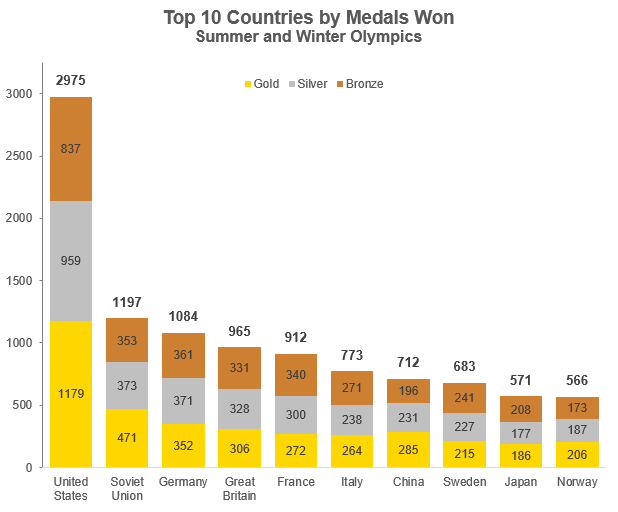

#### 7. Which events has the United States won the most medals in?

This query analyzes medal counts for the United States for each sport in the Summer and Winter Olympics.
<ol>
    <li>The CTE, MedalCounts_USA, joins the two tables Olympic_Athlete_Event_Results and Olympics_Country. It then calculates the medal counts for each sport. The results are filtered to only include medals for the United States, and grouped by sport.</li>
    <li>The main query uses the MedalCounts_USA CTE to select sport, gold_medals, silver_medals, and bronze_medals from the CTE. It also calculates total medals for each sport by summing the individual medal counts. The results are ordered by total medals in descending order, showing the sports where the US has won the most medals first.</li>
</ol>

In [20]:
%%sql

WITH MedalCounts_USA AS (
    SELECT
        c.country,
        COUNT(DISTINCT CASE WHEN e.medal = 'Gold' THEN e.result_id END) AS gold_medals,
        COUNT(DISTINCT CASE WHEN e.medal = 'Silver' THEN e.result_id END) AS silver_medals,
        COUNT(DISTINCT CASE WHEN e.medal = 'Bronze' THEN e.result_id END) AS bronze_medals,
        e.sport
    FROM Olympic_Athlete_Event_Results AS e
    INNER JOIN Olympics_Country AS c
        ON e.country_NOC = c.noc
    WHERE c.country = 'United States'
    GROUP BY e.sport
)
SELECT
    country,
    sport,
    gold_medals,
    silver_medals,
    bronze_medals,
    gold_medals + silver_medals + bronze_medals AS total_medals
FROM MedalCounts_USA
ORDER BY total_medals DESC;

 * sqlite:///Olympics_DB.db
Done.


country,sport,gold_medals,silver_medals,bronze_medals,total_medals
United States,Athletics,343,268,214,825
United States,Swimming,256,182,145,583
United States,Wrestling,57,45,40,142
United States,Diving,48,45,45,138
United States,Artistic Gymnastics,38,45,38,121
United States,Boxing,50,27,40,117
United States,Shooting,57,31,28,116
United States,Rowing,33,32,24,89
United States,Speed Skating,30,19,19,68
United States,Sailing,19,23,19,61


The top 10 sports by medal count for the United States are:
<ol>
    <li>Athletics: 825 total medals</li>
    <li>Swimming: 583 total medals</li>
    <li>Wrestling: 142 total medals</li>
    <li>Diving: 138 total medals</li>
    <li>Artistic Gymnastics: 121 total medals</li>
    <li>Boxing: 117 total medals</li>
    <li>Shooting: 116 total medals</li>
    <li>Rowing: 89 total medals</li>
    <li>Speed Skating: 68 total medals</li>
    <li>Sailing: 61 total medals</li>
</ol>
It is interesting to note that 9 of the top 10 sports are from the Summer games.
<br>

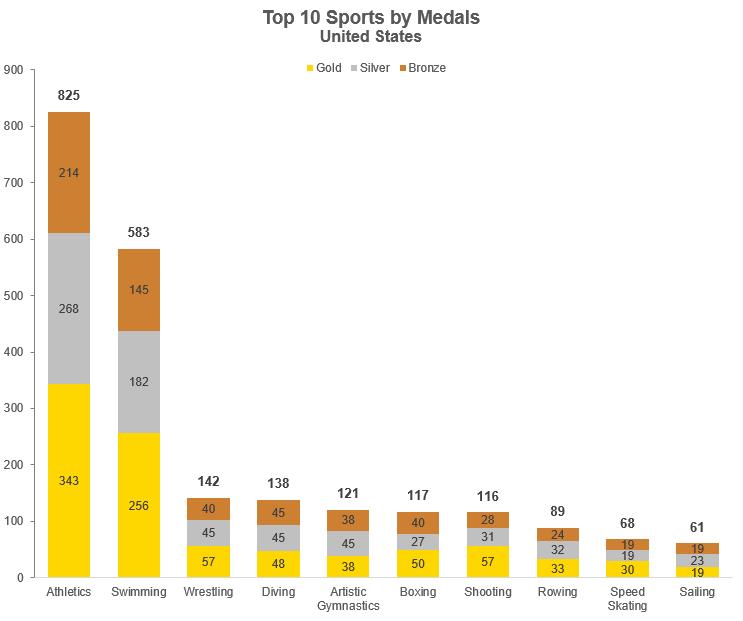

#### 8. Which countries have not won an Olympic medal?

This query identifies the countries that have been assigned an NOC (indicating particpation in the Olympics at least once) and are not present in the Olympic_Games_Medal_Tally table.

In [16]:
%%sql

SELECT
    country,
    noc
FROM Olympics_Country
WHERE noc NOT IN
    (SELECT country_noc
     FROM Olympic_Games_Medal_Tally);

 * sqlite:///Olympics_DB.db
Done.


country,noc
Albania,ALB
American Samoa,ASA
Andorra,AND
Angola,ANG
Antigua and Barbuda,ANT
Aruba,ARU
Bangladesh,BAN
Belize,BIZ
Benin,BEN
Bhutan,BHU


In [18]:
%%sql

SELECT
    COUNT(*) AS Number_Countries
FROM Olympics_Country
WHERE noc NOT IN
    (SELECT country_noc
     FROM Olympic_Games_Medal_Tally);

 * sqlite:///Olympics_DB.db
Done.


Number_Countries
80


Eighty total countries/regions that have participated in the Olympics at least once since 1896 have not won a medal.
Of those, the countries that are in existence today are shown in orange in the map below.
<br>
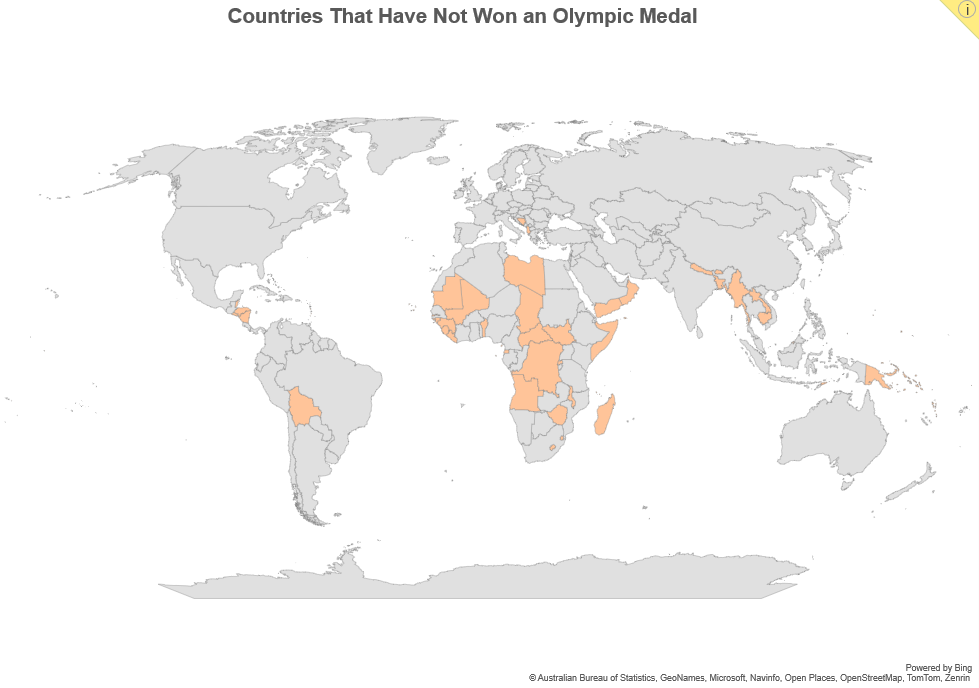

#### 9. How has the number of participating countries changed by year?

This query calculates the number of countries/regions participating in each Summer Olympics.

In [21]:
%%sql

SELECT
    CAST(SUBSTR(edition, 1, 4) AS INTEGER) AS Year,
    SUBSTR(edition, 6) AS Event,
    COUNT(DISTINCT country_noc) AS num_countries
FROM Olympic_Athlete_Event_Results
WHERE SUBSTR(edition, 6) = 'Summer Olympics'
GROUP BY Year
ORDER BY Year;

 * sqlite:///Olympics_DB.db
Done.


Year,Event,num_countries
1896,Summer Olympics,13
1900,Summer Olympics,27
1904,Summer Olympics,10
1908,Summer Olympics,23
1912,Summer Olympics,29
1920,Summer Olympics,29
1924,Summer Olympics,45
1928,Summer Olympics,46
1932,Summer Olympics,47
1936,Summer Olympics,49


<b>Summer Olympics:</b>
<br>
The number of countries participating in the Summer Olympics has increased from 13 in the 1896 games to 206 in the 2020 games.
<br>
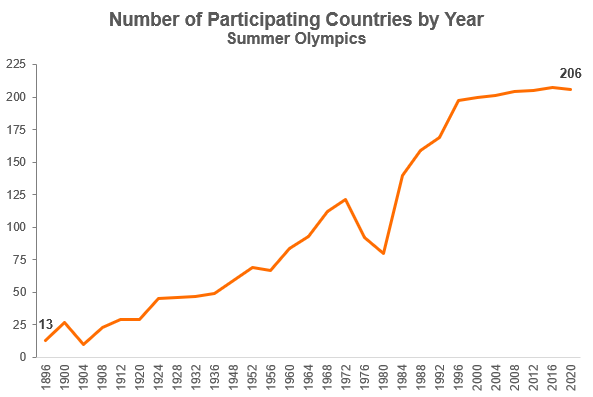

Perform the same query but filter for Winter Olympics.

In [22]:
%%sql

SELECT
    CAST(SUBSTR(edition, 1, 4) AS INTEGER) AS Year,
    SUBSTR(edition, 6) AS Event,
    COUNT(DISTINCT country_noc) AS num_countries
FROM Olympic_Athlete_Event_Results
WHERE SUBSTR(edition, 6) = 'Winter Olympics'
GROUP BY Year
ORDER BY Year;

 * sqlite:///Olympics_DB.db
Done.


Year,Event,num_countries
1924,Winter Olympics,19
1928,Winter Olympics,25
1932,Winter Olympics,17
1936,Winter Olympics,28
1948,Winter Olympics,28
1952,Winter Olympics,30
1956,Winter Olympics,32
1960,Winter Olympics,30
1964,Winter Olympics,36
1968,Winter Olympics,37


<b>Winter Olympics:</b>
<br>
The number of countries/regions participating in the Winter Olympics has increased from 19 in the 1924 games to 91 in the 2022 games.
<br>
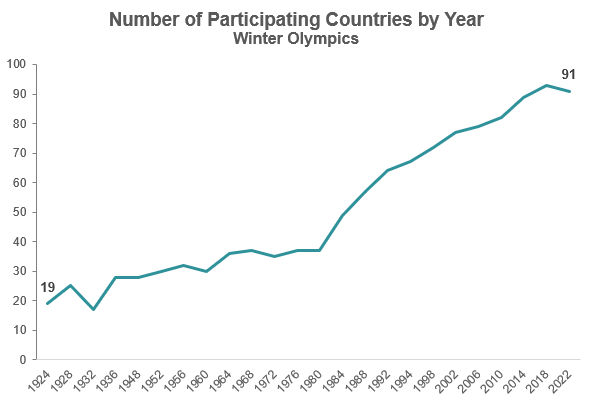
<br>
<br>
It is interesting to note that as of the most recent games (2020 Summer & 2022 Winter), the Summer Olympics has a little more than twice as many participating countries compared to the Winter Olympics.